<a href="https://colab.research.google.com/github/PattarapornH/mnist/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
num_of_train_samples = X_train.shape[0]
num_of_test_samples = X_test.shape[0]
row = X_train.shape[1]
col = X_train.shape[2]

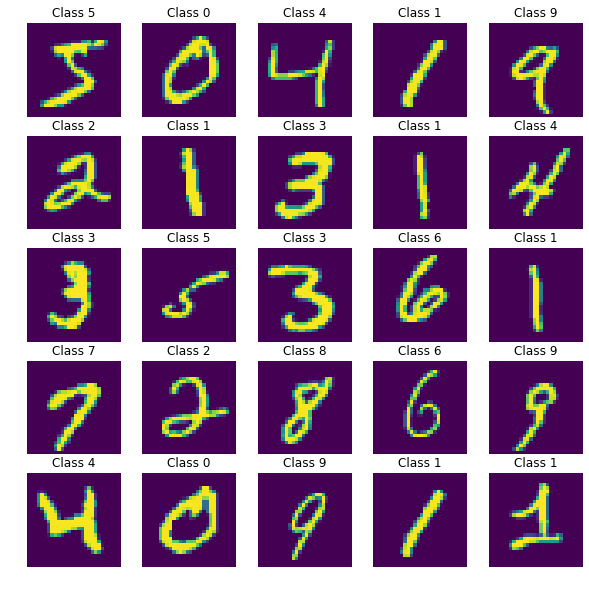

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title("Class {}".format(y_train[i]))

In [0]:
# RGB 0-255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train_re = X_train.reshape(num_of_train_samples, row*col)
X_test_re = X_test.reshape(num_of_test_samples, row*col)

In [0]:
# convert to one-hot
y_train_bin = np_utils.to_categorical(y_train, 10)
y_test_bin = np_utils.to_categorical(y_test, 10)

In [7]:
# Init NN
model = Sequential()

# Input layer
model.add(Dense(128, activation='relu', input_shape=(row*col,)))
model.add(Dropout(0.2))

# Hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_______________

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_model = model.fit(X_train_re,y_train_bin,batch_size=100,epochs=100,validation_data=(X_test_re,y_test_bin))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.3462 - acc: 0.8984 - val_loss: 0.1392 - val_acc: 0.9564
Epoch 2/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1520 - acc: 0.9541 - val_loss: 0.1057 - val_acc: 0.9676
Epoch 3/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1164 - acc: 0.9636 - val_loss: 0.0802 - val_acc: 0.9753
Epoch 4/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.0936 - acc: 0.9712 - val_loss: 0.0792 - val_acc: 0.9742
Epoch 5/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.0818 - acc: 0.9748 - val_loss: 0.0810 - val_acc: 0.9774
Epoch 6/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.0706 - acc: 0.9768 - val_loss: 0.0690 - val_acc: 0.9781
Epoch 7/100
60000/60000 [==============================] - 2s 35us/step - 

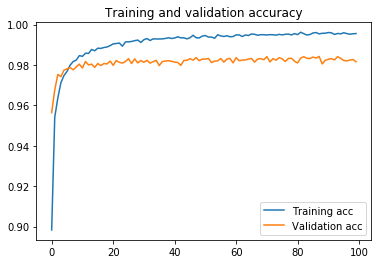

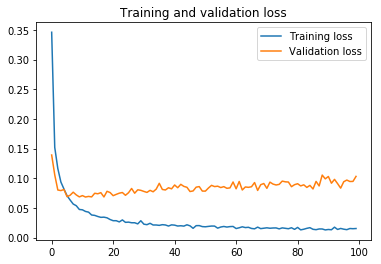

In [9]:
acc = train_model.history['acc']
val_acc = train_model.history['val_acc']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
score = model.evaluate(X_test_re, y_test_bin, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10312096517104291
Test accuracy: 0.9816


In [12]:
score = model.evaluate(X_train_re, y_train_bin, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.0012149232113317946
Train accuracy: 0.9997333333333334


In [0]:
predicted = model.predict_classes(X_test_re)

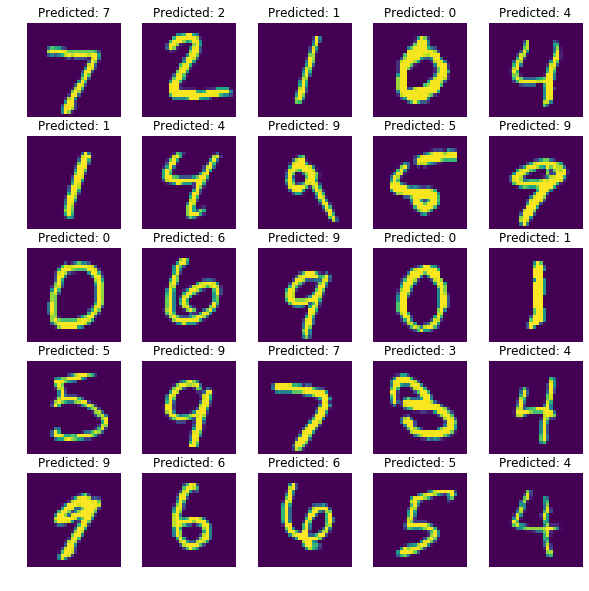

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    title = "Predicted: "+str(predicted[i])
    plt.title(title)
    plt.axis('off')
    plt.imshow(X_test[i])

In [17]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
model.save('gdrive/My Drive/Colab Notebooks/mnist/model.h5')